# Advanced Housing Prices: Feature Engineering 
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

The broad aims of this Machine Learning Project are to understand the dataset and to build a ML pripeline that can predict SalePrice of Houses using various techniques.

The notebooks for different pipes can be found in the this github [repo.](https://github.com/hantablack9/House-Price-Prediction-kaggle)

The dataset and documentation can be found in these links:
[1. Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)
[2. Feature documentation by Dean de Cock](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)


## Some insights that I've gleaned from studying Instructor's notes about the ['Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project'](https://jse.amstat.org/v19n3/decock.pdf) by Dean De Cock, Truman State University


1.  The dataset contains 2930 observations and a set of 80 explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

2. **20 continuous variables** relate to various area dimensions for each observation.

3. The **14 discrete variables** typically quantify the number of items occurring within the house. Most are specifically focused on the number of kitchens, bedrooms, and bathrooms, etc.

4. There are a large number of **categorical variables (23 nominal, 23 ordinal)** associated with this data set. They range from 2 to 28 classes with the smallest being STREET (gravel or paved) and the largest being NEIGHBORHOOD (areas within the Ames city limits). The nominal variables typically identify various types of dwellings, garages, materials, and environmental conditions while the ordinal variables typically rate various items within the property.

5. **Outliers**, bad datapoints: 5 observations to be removed from the data (**a plot of SALE PRICE versus GR LIV AREA** will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). Any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations).

6. **Recommended:** **Incorporating the neighborhood variable** into the model by converting it to a set of dummy variables. Coefficients for the continuous variables tend to have values with more realistic interpretations when used in conjunction with the neighborhood variable.

> Regression Analysis: SalePrice versus Lot Area, Total Bsmt SF, ...

> The regression equation is
SalePrice = 7851 + 1.72 Lot Area + 41.2 Total Bsmt SF + 40.8 Gr Liv Area + 20952 Garage Cars + 8379 FireYN

7. The simple plot of the **total area of a house (basement area + first and second floor area) and the type of sale (Sale Condition)** summarizes much of the variation in sale price. One can see that larger houses cost more with a bonus being paid for “Partial” sales (new homes only partially complete at last assessment) and a discount being paid for “Abnormal” sales (short sales & foreclosures).

8. As a group, the **23 ordinal variables** present special difficulties. Almost all of these variables are quality related, with the expectation that higher categories should yield a coefficient at or above the previous category. In some of my initial modeling, I found that the estimated coefficients for a number of these categories did not follow this rule, likely due to interrelations with other variables within the model. While not incorrect, this situation leads to confusing interpretations (lower quality is better?). I found that some of these anomalies could be remedied by collapsing some of the larger five and ten point quality scales into fewer categories.

9. Closely related to this issue are the **14 discrete variables** which are typically quantifying **various types of rooms or items within a house.** When treated categorically many of these items exhibit the same inconsistency as the ordinal variables (a fourth bathroom actually detracts from the value of a house?). Potentially these inconsistencies can be relieved by treating the variables as covariates which results in equal increases per item (I found this worked well with number of bathrooms) or by once again collapsing the number of categories (which worked well with number of cars per garage).

10. **80% of the variation** in residential sales price can be explained by the neighborhood and total square footage **(TOTAL BSMT SF + GR LIV AREA)** of the dwelling. On the other extreme, I have constructed a model with 36 variables (some of my own creation through recoding and interactions), all significant at the .05 level, which explains 92% of the variation in sales. While I would consider this model overly complicated, it yielded intuitively appealing coefficients where positive attributes (such as being near a park) added to the value of the home and negative attributes (such as being adjacent to a railroad) subtracted from the value.


### **Feature descriptions**

**23 Ordinal Categorical Features**
> Lot Shape (Ordinal): General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
> Utilities (Ordinal): Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
       
> 	
Land Slope (Ordinal): Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope       
       
> Overall Qual (Ordinal): Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
> Overall Cond (Ordinal): Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

> Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
> Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
> Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
> Bsmt Cond (Ordinal): Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
> Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
> BsmtFin Type 1	(Ordinal): Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
> BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
> 		
> HeatingQC (Ordinal): Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

		
> Electrical (Ordinal): Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
       
> KitchenQual (Ordinal): Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
> Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
       
> FireplaceQu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

> Garage Finish (Ordinal)	: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		


> Garage Area (Continuous): Size of garage in square feet

> Garage Qual (Ordinal): Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
> Garage Cond (Ordinal): Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
> Paved Drive (Ordinal): Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
> Pool QC (Ordinal): Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
> Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence       
       


4.2 **23 Nominal Categorical Features**

> PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 

> MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       02 0	2 FAMILY CONVERSION - ALL STYLES AND AGES

> MS Zoning (Nominal): Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       
> Street (Nominal): Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
> Alley (Nominal): Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
> Land Contour (Nominal): Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

> Lot Config (Nominal): Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
> Neighborhood (Nominal): Physical locations within Ames city limits (map available)

> Condition 1 (Nominal): Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
> Condition 2 (Nominal): Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
> Bldg Type (Nominal): Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
> House Style (Nominal): Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
> Roof Style (Nominal): Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
> Roof Matl (Nominal): Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
> Exterior 1 (Nominal): Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
> Exterior 2 (Nominal): Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
> Mas Vnr Type (Nominal): Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
       
> Foundation (Nominal): Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
       
> Heating	(Nominal): Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
> HeatingQC (Ordinal): Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
> Central Air (Nominal): Central air conditioning

       N	No
       Y	Yes
       
> Garage Type (Nominal): Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
> Misc Feature (Nominal): Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
> Sale Type (Nominal): Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
> Sale Condition (Nominal): Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


The **14 discrete numeric variables** typically quantify the number of items occurring within the house. Most are specifically focused on the number of kitchens, bedrooms, and bathrooms, etc.

> Year Built (Discrete): Original construction date

> Year Remod/Add (Discrete)

> Bsmt Full Bath (Discrete): Basement full bathrooms

> Bsmt Half Bath (Discrete): Basement half bathrooms

> Full Bath (Discrete): Full bathrooms above grade

> Half Bath (Discrete): Half baths above grade

> Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)

> Kitchen (Discrete): Kitchens above grade

> TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)

> Fireplaces (Discrete): Number of fireplaces

> Garage Yr Blt (Discrete): Year garage was built

> Garage Cars (Discrete): Size of garage in car capacity

> Mo Sold (Discrete): Month Sold (MM)

> Yr Sold (Discrete): Year Sold (YYYY)



**20 continuous numerical variables** relate to various area dimensions for each observation.

> Lot Frontage (Continuous): Linear feet of street connected to property

> Lot Area (Continuous): Lot size in square feet

> Mas Vnr Area (Continuous): Masonry veneer area in square feet

> BsmtFin SF 1 (Continuous): Type 1 finished square feet

> BsmtFin SF 2 (Continuous): Type 2 finished square feet

> Bsmt Unf SF (Continuous): Unfinished square feet of basement area

> Total Bsmt SF (Continuous): Total square feet of basement area

> 1st Flr SF (Continuous): First Floor square feet
 
> 2nd Flr SF (Continuous)	: Second floor square feet

> Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)

> Gr Liv Area (Continuous): Above grade (ground) living area square feet

> Garage Area (Continuous): Size of garage in square feet

> Wood Deck SF (Continuous): Wood deck area in square feet

> Open Porch SF (Continuous): Open porch area in square feet

> Enclosed Porch (Continuous): Enclosed porch area in square feet

> 3-Ssn Porch (Continuous): Three season porch area in square feet

> Screen Porch (Continuous): Screen porch area in square feet

> Pool Area (Continuous): Pool area in square feet

> Misc Val (Continuous): $Value of miscellaneous feature

> SalePrice (Continuous): Sale price $$


## **I will now perform feature engineering in this notebook.**

I will look into and perform the folowing for:
1. Feature Transformations, Outliers
2. Missing value fixes : Temporal, Categorical, Numeric features
3. Feature scaling

Preceding steps of this data pipeline are in different notebooks and can be accessed from this github [repo.](https://github.com/hantablack9/House-Price-Prediction-kaggle/tree/main)


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

from IPython.display import display

%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_tr = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", index_col = 'Id')
df_t = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", index_col = 'Id')

In [3]:
df_tr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_t.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 0. Clean-up: Feature transformations, Outlier Management

Lets perform a little housekeeping to make the features manageable. 

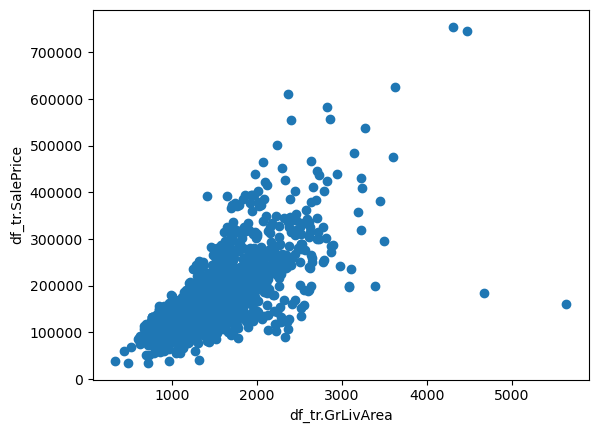

In [5]:
## Outliers according to the author of the documentation, to be removed
plt.scatter(df_tr.GrLivArea, df_tr.SalePrice )
plt.xlabel('df_tr.GrLivArea'), plt.ylabel('df_tr.SalePrice');

In [6]:
## There seems to be 2 extreme outliers on the bottom right, 
## really large houses that sold for really cheap. 
## More generally, the author of the dataset recommends removing 
## 'any houses with more than 4000 square feet' from the dataset.
df_tr = df_tr[df_tr.GrLivArea < 4000]

In [7]:
## Log Normal transform on target variable
## This ensures errors (yhat - y) will effect equally for both expensive and cheap houses
df_tr['log_SalePrice'] = np.log1p(df_tr.SalePrice)
y=df_tr.log_SalePrice
y

Id
1      12.248
2      12.109
3      12.317
4      11.849
5      12.429
        ...  
1456   12.073
1457   12.255
1458   12.493
1459   11.864
1460   11.902
Name: log_SalePrice, Length: 1456, dtype: float64

In [8]:
## 4 Outliers removed
## Now we deal with Numeric features which are actually categories
#df_tr['MSSubClass'].unique(), df_t['MSSubClass'].unique()

num_features = [feature for feature in df_tr.columns if df_tr[feature].dtypes != 'O']
print(len(num_features), num_features)

38 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'log_SalePrice']


In [9]:
cat_features = [feature for feature in df_tr.columns if df_tr[feature].dtypes == 'O']
print(len(cat_features), cat_features)

43 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [10]:
##'MSSubClass': Nominal
## 'OverallQual', 'OverallCond': Ordinal, Categorical
##' MoSold',' YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt': Temporal

In [11]:
df_tr.MoSold.unique(), df_t.MoSold.unique()

(array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6]),
 array([ 6,  3,  1,  4,  5,  2,  7, 10,  8, 11,  9, 12]))

In [12]:
# Some numerical features are actually really categories
df_tr = df_tr.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
# Some numerical features are actually really categories
df_t = df_t.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [ ]:
# Encoding ordinal categorical features as ordered numbers when there is information in the order
df_tr = df_tr.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

## 1. Missing Values

In [ ]:
## Missing Categorical Values in training data
cat_na_features = [features for features in df_tr.columns if df_tr[features].isnull().sum()>1 and df_tr[features].dtypes=='O']

print('======= Train data: Categorical Features with Missing Values =======')
for feature in cat_na_features:
    print(feature,'\t\t', np.round(df_tr[feature].isnull().mean(),3), '%')

In [ ]:
## Missing Categorical Values in test data
test_cat_na_features = [features for features in df_t.columns if df_t[features].isnull().sum()>1 and df_t[features].dtypes=='O']

print('======= Test data: Categorical Features with Missing Values =======')
for feature in test_cat_na_features:
    print(feature,'\t\t', np.round(df_t[feature].isnull().mean(),3), '%')

In [ ]:
## Train data : Custom replace funcion
def replace_cat_missing_vals(dataset, na_features):
    data = dataset.copy()
    data[na_features] = data[na_features].fillna('Missing')
    
    return data
df_tr = replace_cat_missing_vals(df_tr, cat_na_features)

df_tr[cat_na_features].isnull().sum()

In [ ]:
## Train data: Missing Numeric Variables

train_num_na_features = [features for features in df_tr.columns if df_tr[features].isnull().sum()>1 and df_tr[features].dtypes!='O']

print('======= Numeric Features with Missing Values =======')
for feature in train_num_na_features:
    print(feature,'\t\t', np.round(df_tr[feature].isnull().mean(),3), '%')## Replace 

In [ ]:
## Train data: Custom replace for missing values 
for feature in train_num_na_features:
    #using medians because of presence of outliers
    median_value = df_tr[feature].median()
    
    #create new features to capture nan values
    df_tr[feature+' nan'] = np.where(df_tr[feature].isnull(),1,0)
    df_tr[feature].fillna(median_value, inplace=True)

df_tr[train_num_na_features].isnull().sum()

In [ ]:
year_features=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for feature in year_features:
    df_tr[feature]=df_tr['YrSold']-df_tr[feature]

In [ ]:
year_features=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for feature in year_features:
    df_t[feature]=df_t['YrSold']-df_t[feature]

In [ ]:
df_tr[year_features]

In [ ]:
df_t[year_features]

## 2. Feature Scaling

## 